In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import warnings  
warnings.filterwarnings('ignore')

### Heart Attack EDA and ML model building
    Heart attack Analysis using Eda and 
    machine learning predictive model Using KNN and RAndom Forest Classifier
    The dataset was uploaded to kaggle by Rashik Rahman
    link to dataset : https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
    Any critics helps

In [25]:
heart_attack = pd.read_csv('heart.csv')
heart_attack

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [26]:
#check for null values
heart_attack.isnull().sum()
#no null values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [27]:
#check dtypes
heart_attack.dtypes
#all numeric type
#but some features must be categorical, so the data is cleaned and changed to numeric
#must find which features are categorical


age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

### so since the data is already cleaned, we can just start the EDA
#### first analze each features and later, their coorelation with our target

#### 1. Age : 
    does certain age range has higher heart attack risk? 
    from our dataset, visualize 0 and 1 (target) and compare the age range

#### 2. Sex (0=Female 1=Male) :
    Does one gender has higer risk of heart attack over ther other?
    

#### EXNG (exercise induce angina) : 
    angina is chest pain or pressure, usually due to insufficient blood flow to the heart muscle
    in the dataset value 1 if angina is caused by exercise and 0 if caused by other reason 

#### CA: number of major vessels
        Does low or high number has a correlation to higher heart attack risk?
        
#### Chest Pain : the most important feature i think   
    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
    
    Visualize between 0 and 1, and put hue = cp, so we can see in comparison
     in higher chance of heart attack (1 in our target), which chest pain value is most dominan
     in lower chance (0 in our target) which cp value is more dominan
     in here we can see which value is more likely linked to higher heart attack risk

#### trtbps : resting blood pressure (in mm Hg)
    usually resting blood pressure is denoted as systolic/diatolic (e.g. 120/80 Mmhg)
    but in our dataset it seems only the systolic part is recorded
    normal trtbps for nomal perso is  below 120/80 mm Hg and above 90/60 mm Hg in an adult. 
    does higher trtbps result in higher risk oh Heart attack?
    visualize the target and trtbps and AGE, usually older people tend to have higher trtbps.
        
    "As you age, the vascular system changes. This includes your heart and blood vessels. 
    In the blood vessels, there’s a reduction in elastic tissue in your arteries, 
    causing them to become stiffer and less compliant. As a result, your blood pressure increases". 
    as describe from nakano in healthline.com 
        
    we have to find if the high risk group is dominantly occupied by old people (above 40) and have high blood pressure, 
    visualize this for easier initial analysis
        
#### chol : cholestoral in mg/dl fetched via BMI sensor

    it is well known that High cholesterol can limit blood flow, increasing the risk of a heart attack or stroke. 
    Total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults.
    A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered 
    high
    
    need to confirm if high chol results in higher heart attack risk
    again, visualize the target with our chol feature, in high risk group what is the most common range of cholestrol
    also, cholestrol has higher chance of being high for old people
 
#### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    fasting blood sugar is the level of blood sugar taken after a patient has fast for certain amount period of time. 
    Does high blood sugar level (more than 120 mg/dl) has higher chance for a heart attack?

#### rest_ecg : resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
    resting ecg taken while the patient rest (there is also ecg taken while the patient is running on treadmill)
    
    does higher rest_ecg result (0, 1, 2) has higher chance of heart attack?
    
#### thalach : maximum heart rate achieved
      does higher thalach result in higher risk?
       
#### thall - 3 = normal; 6 = fixed defect; 7 = reversable defect

#### oldpeak - ST depression induced by exercise relative to rest
#### slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)

#### Target (0 = Low Heart attack risk, 1=high attack risk)

In [28]:
#Since the data is already cleaned and no null-values, we can go straight to EDA and build predictive model later
#we would be able to know which feature is categorical and numerical through  features explanation
#but we can also make sure of it by showing each features cardinality
#categorical data will have low cardinality, and doing this will also helps us in building predictive model later

heart_attack.nunique()


#there are 303 rows, and these are health informations of each sample

#age : numerical
#sex : categorical
#cp (chest pain) : categorical (1: typical angina,  2: atypical angina,  3: non-anginal pain,  4: asymptomatic)
#trtbps (resting blood pressure) : numerical
# chol (cholesterol) : numerical
# fbs (fasting blood sugar) : categorical ((fasting blood sugar > 120 mg/dl) (1 = true; 0 = false))
# restecg (resting electrocardiographic results) :  categorical 
#thalachh (maximum heart rate achieve) : numerical
#exng (exercise induce angina) : categorical
#oldpeak (ST depression induced by exercise relative to rest) : numerical
#slp (slope, slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)) : categorical
#caa ( number of major vessels): categorical
#thal : categorical


#output is the target (0: low heart attack risk, 1: high heart attack risk)

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [29]:
#classify the features 

numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

target = heart_attack['output']

heart_attack =  heart_attack.drop(['output'], axis=1)


## Univariate Analysis

### Numerical Data

In [30]:
# Descriptive statistic
# numerical features only
heart_attack[numerical_features].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### age
    mean of age is 54
    minimum age is 29, so no children, teen or early adult data
    maximum age is 77 years old
    median is 55 years old, close to our mean, there are probably no outliers, 
        but we still have to check for outliers with histogram or distribution plot later 
        standard deviation is 9, it means if our dataset distribution is normal, 68% of age values wil be around 45-63 
        years old and 95% of age values will be around 36-72years old

#### resting blood pressure
    it seems only systolic is recorded
    mean and median is close to each other 131 and 130, so probably no outliers
        this considered as high value because normal people trtbps is below 120/80 Mmhg and above 90/60 Mmhg
        but we have to check the correlation with age, because older people then to have higher trtbs
    minimum trtbs value is 94, the minimum value recorded in dataset  (healthy value)
    maximum value is 200, it's hypertension, and people who have this high blood pressure
        will experience chest pain, headache, shortness of breath or blood in the urine
        it is the the highest trtbps in our dataset
    standard deviation is 17, with our means of 131 (assuming no outliers and bell-shaped distribution),
        68% of trtbps values will be around 114-148
      
#### cholesterol
    mean and median is still pretty close at 241 and 246 , but there maybe small amounts of outliers
    these numbers are not good numbers
    Total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults. 
    A reading between 200 and 239 mg/dL is considered borderline high
    and a reading of 240 mg/dL and above is considered high
    minimum and maximum values are 126 and 564, 
        126 is borderline low (too low can lead to another type of health risk, but we wouldn't explain it further)
        564 is too high  (this might be sign of obesity , and can cause symptoms; angina and chest pain)
    standard deviation is 51, assuming no outliers (removing or transform) and bell-shape distribution,
        68% of chol values is around 190-297
    
    
####  thalachh (maximum heart rate achieved)
     mean and median 149-153, there maybe small amount of outliers
         according to heart.org, good heart rate per person is vary depend on age (220-age)
     standard deviation 22 (68% of data will be around 127-175)
     min and max values are 71 and 202

#### oldpeak (ST depression induced by exercise relative to rest)
    still have not idea what this feature means, but it is in our dataset
    so this must be important value to determine the risk ofheart attack
    we can understand this further later in bivariate analysis and features importance
        

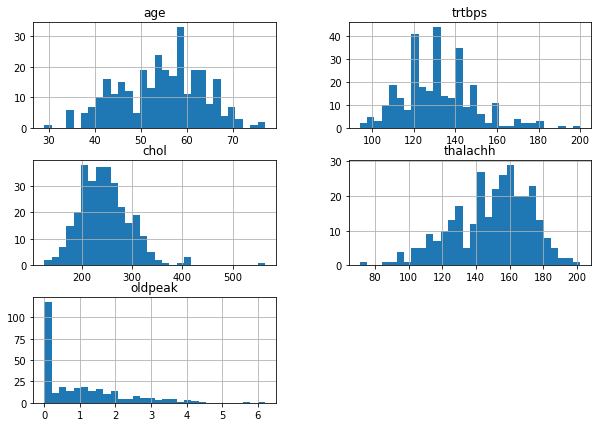

In [31]:
#histogram to see our distribution
heart_attack[numerical_features].hist(bins=30, figsize= (10, 7))
plt.savefig('num_hist.png')
plt.show()

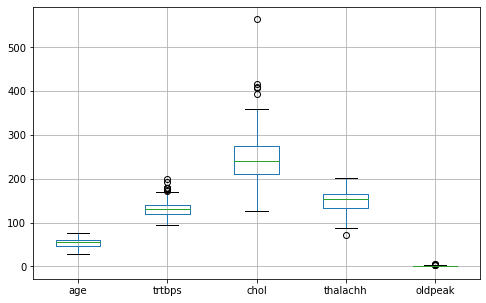

In [32]:
fig, ax = plt.subplots(figsize=(8, 5))
#for i in list(heart_attack[numerical_features].columns):
heart_attack[numerical_features].boxplot()
#ax.set_xticklabels(list(heart_attack[numerical_features].columns))
plt.savefig('num_boxplot.png')
plt.show()

#### Distribution Analysis
    Age and Thallach seems to follow normal distribution
    Cholesterol has outliers and skewed to the right
    Trtbps has few outliers
    Oldpeak is highly skewed to the right with long tail
    
    Since i will use KNN classifier later, it is necessary to transform these numerical features

### Categorical Data

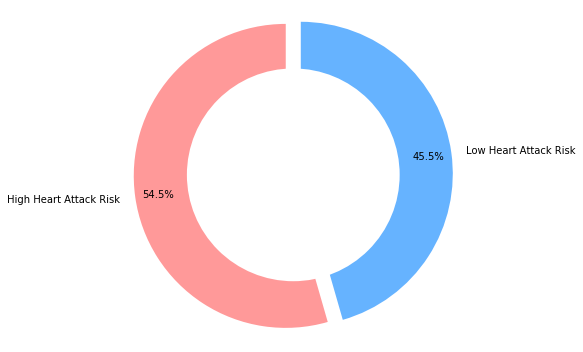

In [33]:
#fig, ax = plt.subplots(figsize=(10, 8))

translate_output = {'output' : {1: 'High Heart Attack Risk',  0 : 'Low Heart Attack Risk'}}

# Pie chart
labels = list(target.value_counts().reset_index()['index'])
labels = [translate_output['output'][i] for i in labels]
sizes = list(target.value_counts().reset_index()['output'])

#colors
colors = ['#ff9999','#66b3ff']
#explsion
explode = (0.05,0.05)
fig, ax = plt.subplots(figsize=(8, 5)) 
ax.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.savefig('target_pie.png')
plt.show()

   54.5% sample in the dataset has high chance of heart attack

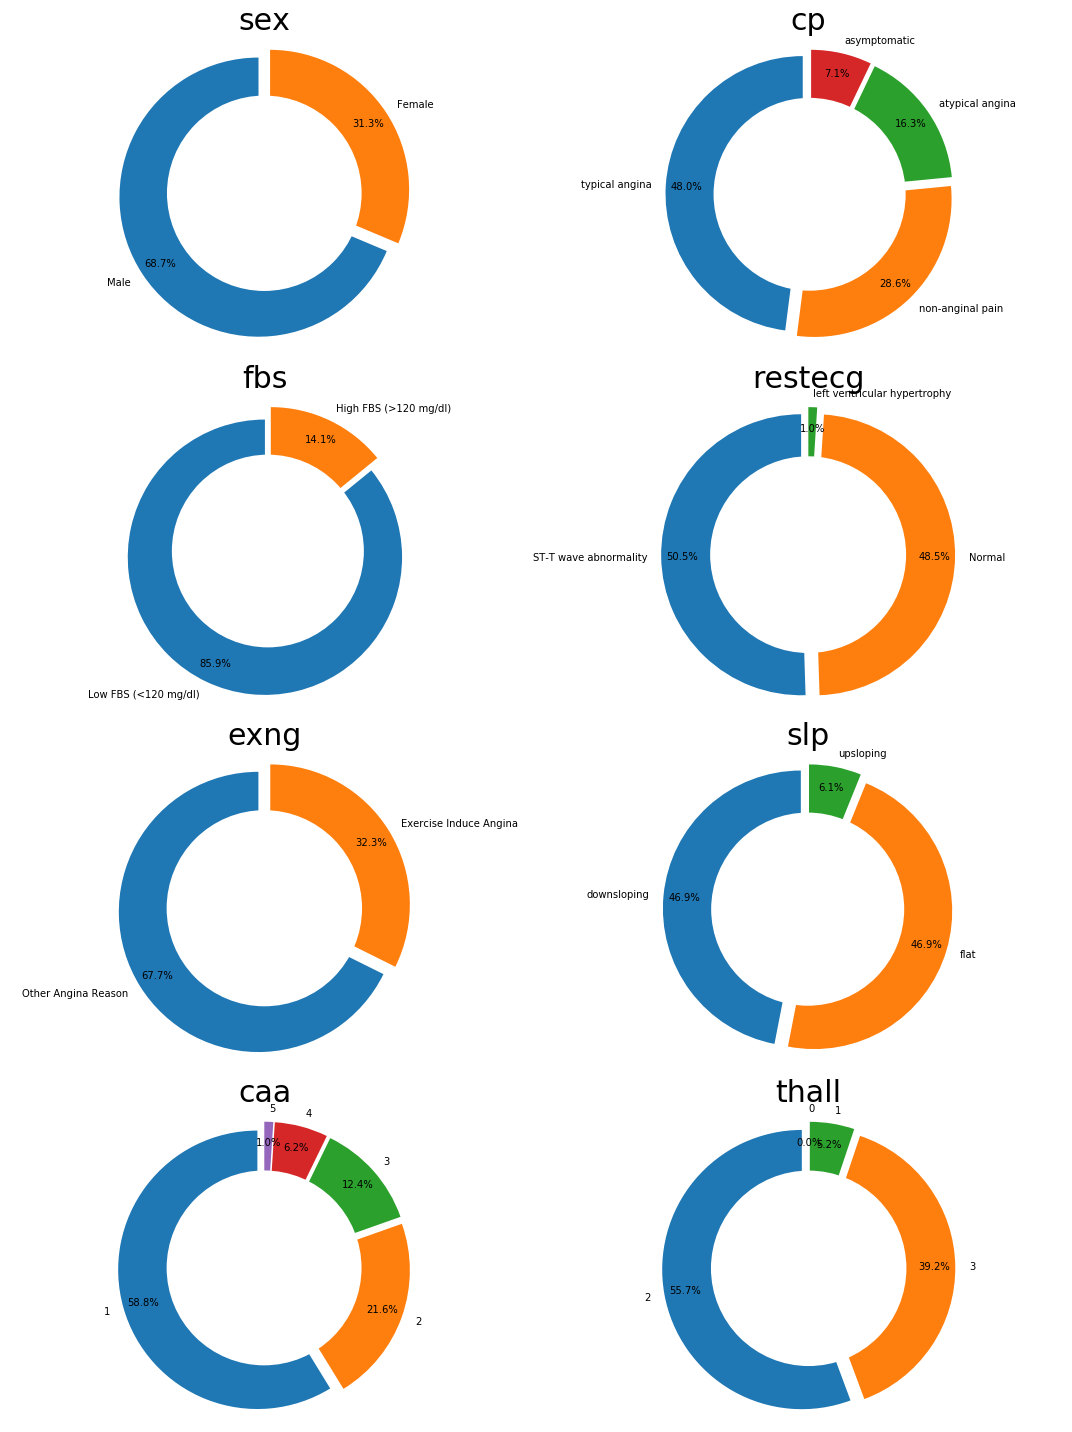

In [34]:
#Categorical features 
#starts with this question, what is the dominant value of each cat features?


translate_values = {'sex' : {0: 'Female', 1:'Male'},
                   'cp' : {0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'}, 
                   'fbs': {0: 'Low FBS (<120 mg/dl)', 1: 'High FBS (>120 mg/dl)'}, 
                   'restecg': {0 : 'Normal', 1 : 'ST-T wave abnormality', 2: 'left ventricular hypertrophy'}, 
                   'exng' : {0: 'Other Angina Reason', 1 : 'Exercise Induce Angina'}, 
                   'slp' : {0: 'upsloping', 1 : 'flat', 2: 'downsloping'}, 
                   'caa' : {0:1, 1:2, 2:3, 3:4, 4:5},
                   'thall': {0:0, 1:1, 2:2, 3:3}}



fig = plt.figure(figsize=(15, 20))
for x in range(len(list(heart_attack[categorical_features].columns))):
    labels = list(heart_attack[categorical_features][categorical_features[x]].value_counts().reset_index()['index'])
    translated_label = [translate_values[categorical_features[x]][i] for i in labels] #translate label for readability
    sizes = [i for i in list(heart_attack[categorical_features][categorical_features[x]].value_counts().reset_index()[categorical_features[x]])]
    size_true = [int(i/sum(sizes)*100) for i in sizes]
    explode = tuple([0.05 for i in range(len(labels))])
    ax = plt.subplot(4, 2, x+1)
    ax.pie(size_true, labels=translated_label, autopct='%1.1f%%', startangle=90, pctdistance=0.85 , explode = explode) #, textprops={'fontsize': 20}
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    ax.axis('equal') 
    plt.title(categorical_features[x], fontsize=30)
    plt.tight_layout()
#fig.suptitle(year[x], fontsize=16, y=1.03)
plt.savefig('cat_pie.png')
plt.show()

### All analysis is based on dataset
    1. Sex : There are more Male than Female in our dataset
    2. Chest pain : 48% chest pain is caused by typical angina 
    3. Fbs : 85.9% sample has normal blood sugar level (<120mg/dl)
    4. Restecg : 48.5% has normal heartwave, 50.5 has ST-T wave abnormality
    5. Exng : 67.7% has Angina caused by other reasons than exercise

## Bivariate Analysis

### Numerical Features

<Figure size 1152x1152 with 0 Axes>

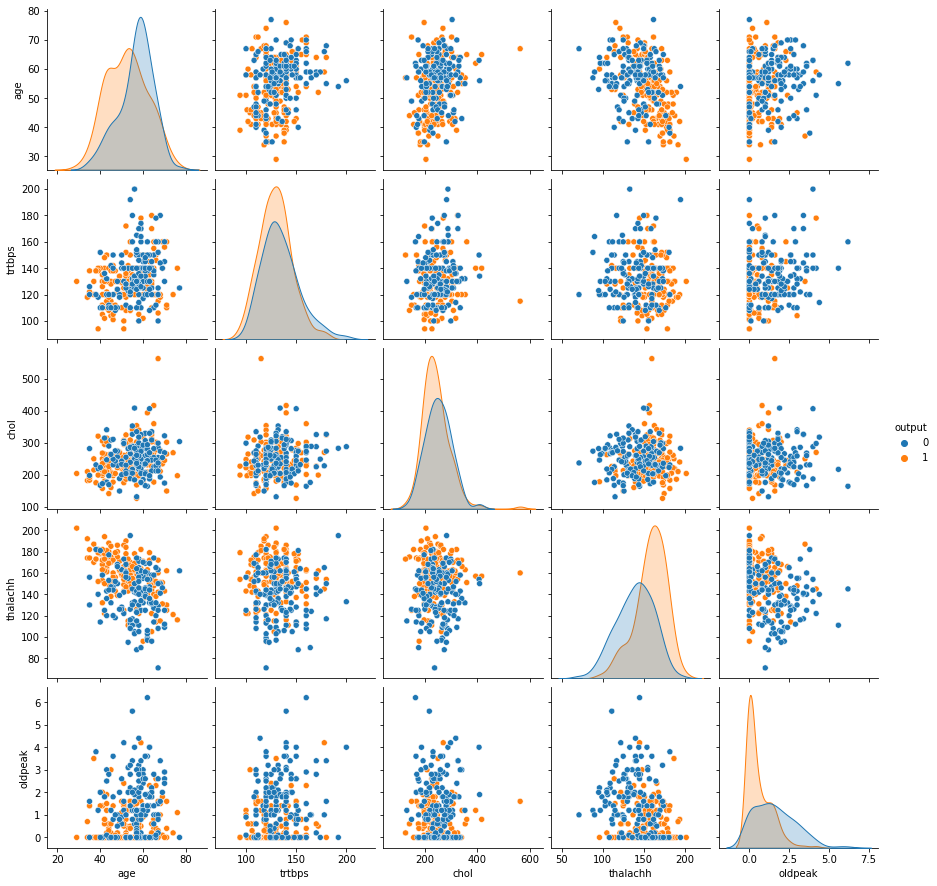

In [35]:
#try to use pairplot
fig1 = plt.figure(figsize=(16,16))
sns.pairplot(pd.concat([heart_attack[numerical_features], target], axis=1), hue='output')
plt.savefig('num_pairplot.png')
plt.show()

### Analysis
    fromm scatterplot above, we only see  positive correlation between age and cholesterol, looks like older people tend to have higher cholesterol

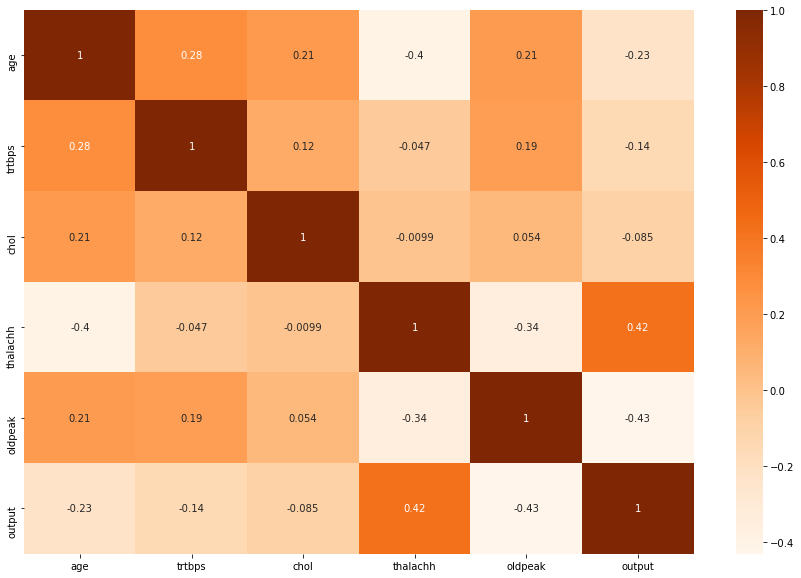

In [36]:
#heatmap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pd.concat([heart_attack[numerical_features], target], axis=1).corr(),annot=True,cmap="Oranges",ax=ax)
plt.savefig('num_heatmap.png')
plt.show()

#### No strong correlation
    Cp, thalachh, and slp show positive correlation but close to 0 rather than 1

### Categorical 

<Figure size 1152x1152 with 0 Axes>

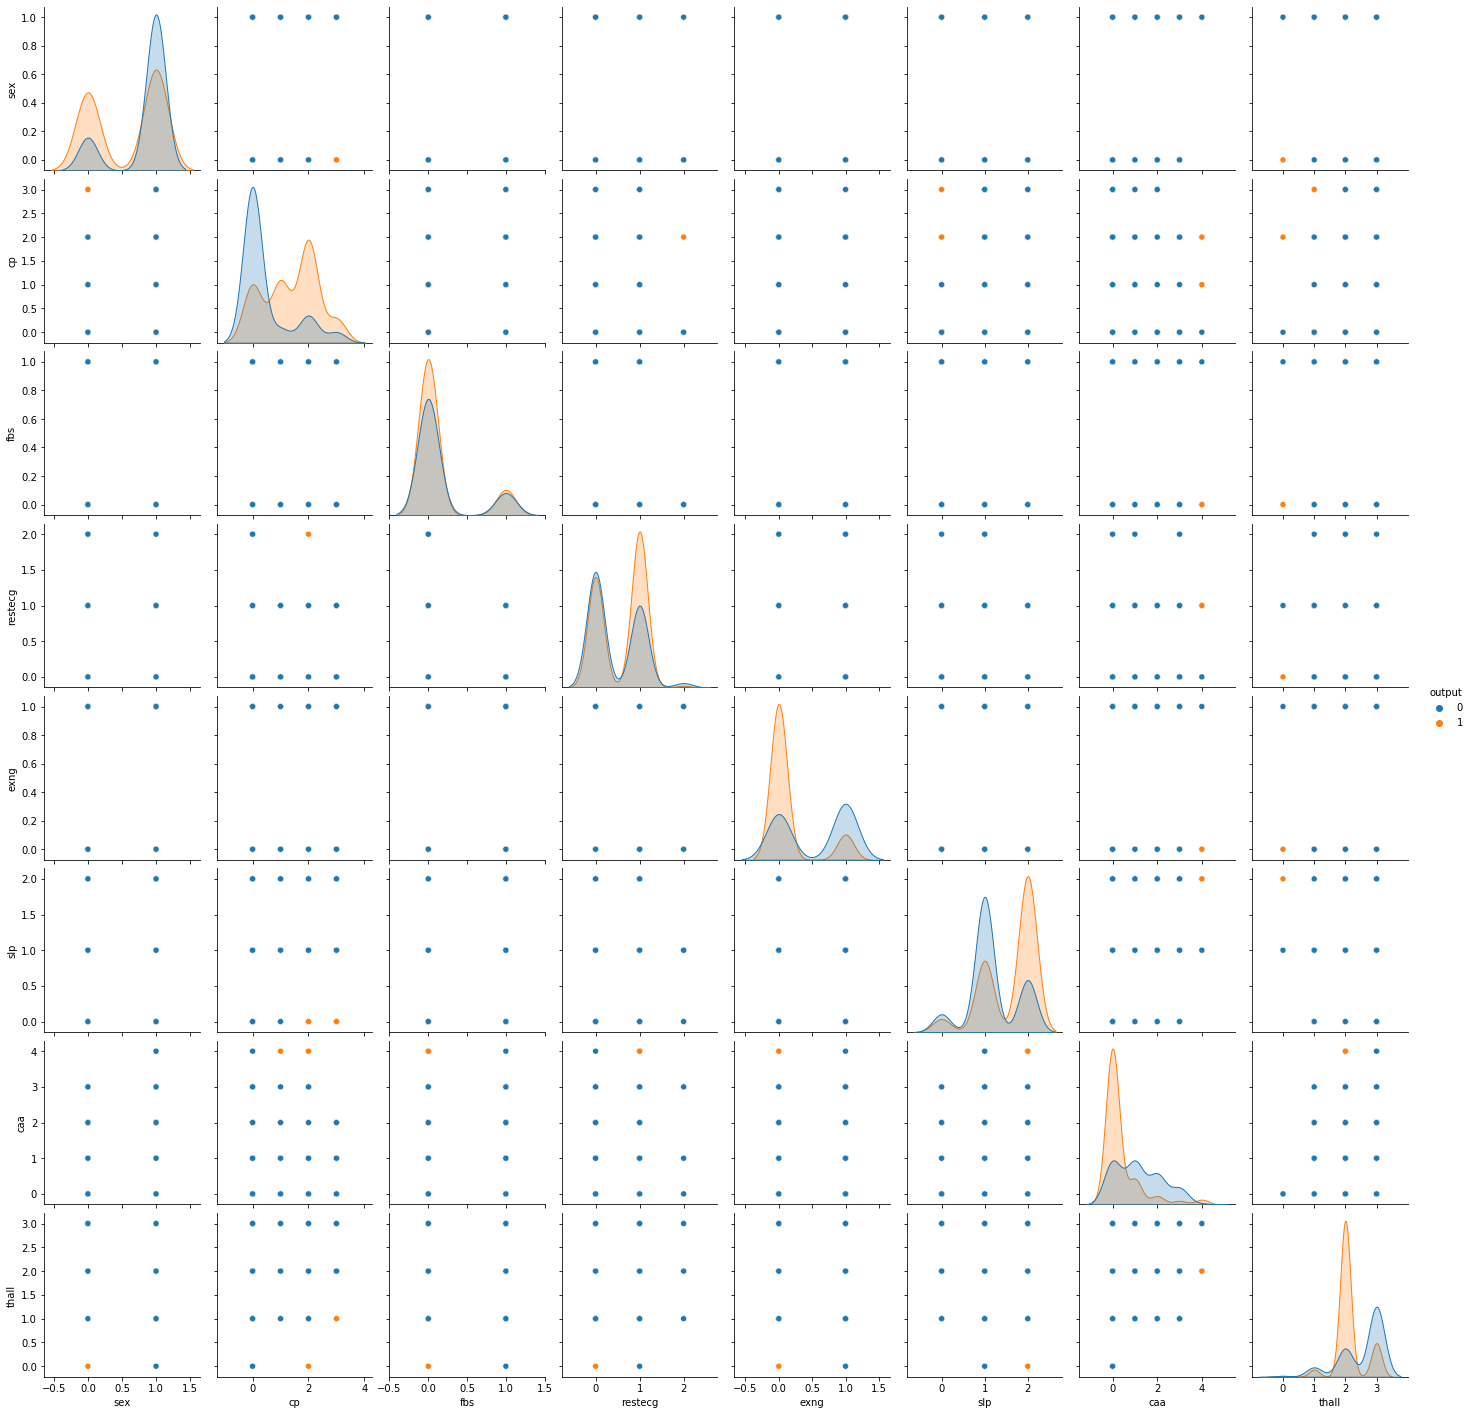

In [37]:
#try to use pairplot
fig1 = plt.figure(figsize=(16,16))
sns.pairplot(pd.concat([heart_attack[categorical_features], target], axis=1), hue='output')
plt.savefig('cat_pairplot.png')
plt.show()


### Building Machine Learning Model

### Mutual Information Score

In [38]:
def mi_scores(dataset, target):
    mutual_class = mutual_info_classif(dataset, target, random_state=42)
    mutual_class = pd.Series(mutual_class, name="mutual information scores", index=dataset.columns)
    mutual_class = mutual_class.sort_values(ascending=False)
    return mutual_class

mutual_info_score = mi_scores(heart_attack, target)
mutual_info_score # show a few features with their MI scores

thall       0.141327
caa         0.136195
cp          0.127325
slp         0.102013
oldpeak     0.100766
chol        0.084077
exng        0.077001
thalachh    0.070234
restecg     0.045703
fbs         0.036288
trtbps      0.019469
age         0.005797
sex         0.000000
Name: mutual information scores, dtype: float64

Text(0.5, 1, 'Mutual Information Scores')

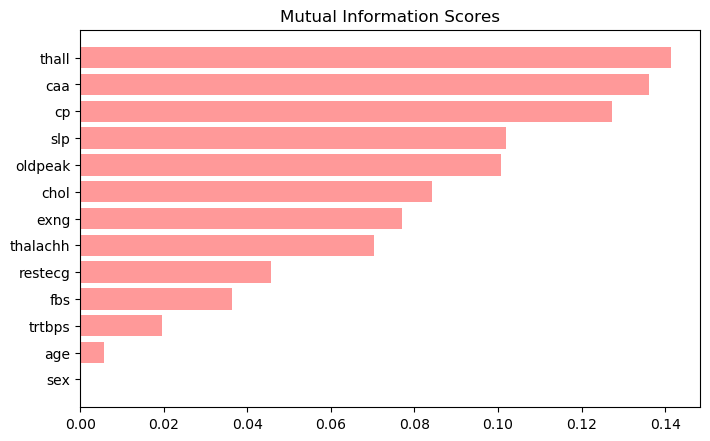

In [39]:
plt.figure(dpi=100, figsize=(8, 5))
mutual_info_score = mutual_info_score.sort_values(ascending=True)
width = np.arange(len(mutual_info_score))
ticks = list(mutual_info_score.index)
plt.barh(width, mutual_info_score, color= '#ff9999')
plt.yticks(width, ticks)
plt.savefig('mutual_information_score.png')
plt.title("Mutual Information Scores")


#### Mutual information analysis
    Thall, caa and cp have the strongest relationship with our target
    fbs, trtbps, and age has low relationship with our target
    meanwhile sex is independen and doesn't show any relationship with our target

### Normalize and Transform Features

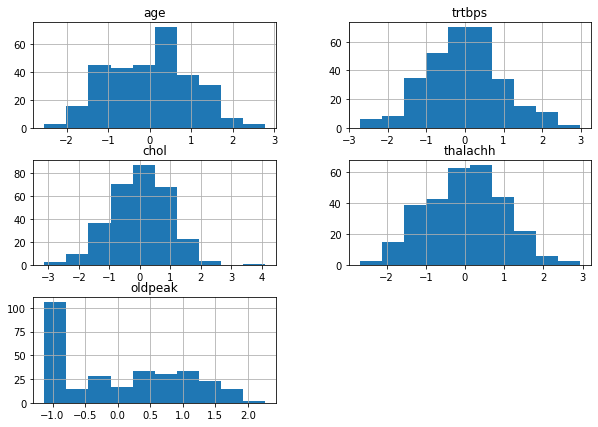

In [40]:
#before we go any further, 
#i want to Standardize and transform our numerical feature so it will be more gaussian like

robust_scale = RobustScaler()
power = PowerTransformer()
data_trans = robust_scale.fit_transform(heart_attack[numerical_features])
data_trans = power.fit_transform(data_trans)
df = pd.DataFrame(data_trans, columns=heart_attack[numerical_features].columns)
ax = df.hist(figsize=(10, 7))
plt.savefig('num_hist_scale_and_transform.png')
plt.show()

In [41]:
#replace old value with new value
heart_attack2 =heart_attack.copy()
heart_attack2.drop(labels=numerical_features, axis=1, inplace=True)
heart_attack2[numerical_features] = df[numerical_features]
heart_attack2

,sex,cp,fbs,restecg,exng,slp,caa,thall,age,trtbps,chol,thalachh,oldpeak
0,1,3,1,0,0,0,0,1,0.955998,0.827039,-0.146920,-0.106865,1.198359
1,1,2,0,1,0,0,0,2,-1.802458,0.025480,0.203788,1.929109,1.659514
2,0,1,0,0,0,2,0,2,-1.422818,0.025480,-0.834289,1.016585,0.660704
3,1,1,0,1,0,2,0,2,0.128752,-0.628494,-0.082079,1.368728,0.106164
4,0,0,0,1,1,2,0,2,0.242685,-0.628494,1.831831,0.523215,-0.141799
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0.242685,0.578229,0.023132,-1.151090,-0.756443
299,1,3,0,1,0,1,0,3,-1.031573,-1.374399,0.466148,-0.831534,0.500579
300,1,0,1,1,0,1,2,3,1.583465,0.778444,-1.121220,-0.486157,1.627928
301,1,0,0,1,1,1,1,3,0.242685,0.025480,-2.966281,-1.417779,0.500579


In [42]:
#perform ONE-Hot Encoding for our Categorical feature
#all our categorical features has cardinality less than 5, so OHE would be ideal
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_trans2 = pd.DataFrame(OH_encoder.fit_transform(heart_attack2[categorical_features]))
data_trans2.index = heart_attack2.index
heart_attack2 = heart_attack2.drop(categorical_features, axis=1)
heart_attack2 = pd.concat([heart_attack2, data_trans2], axis=1)
#now our dataset is ready for any machine learning model
heart_attack2

,age,trtbps,chol,thalachh,oldpeak,0,1,2,3,4,...,15,16,17,18,19,20,21,22,23,24
0,0.955998,0.827039,-0.146920,-0.106865,1.198359,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.802458,0.025480,0.203788,1.929109,1.659514,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.422818,0.025480,-0.834289,1.016585,0.660704,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.128752,-0.628494,-0.082079,1.368728,0.106164,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.242685,-0.628494,1.831831,0.523215,-0.141799,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.242685,0.578229,0.023132,-1.151090,-0.756443,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
299,-1.031573,-1.374399,0.466148,-0.831534,0.500579,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,1.583465,0.778444,-1.121220,-0.486157,1.627928,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
301,0.242685,0.025480,-2.966281,-1.417779,0.500579,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
x_train, x_valid, y_train, y_valid = train_test_split(heart_attack2, target, train_size=0.8, test_size=0.2, random_state=0)

### KNN

In [44]:
#KNN
knn = KNeighborsClassifier(n_neighbors=10)

# Train the model using the training sets
knn.fit(x_train,y_train)

#Predict Output
y_pred = knn.predict(x_valid)
knn_score = metrics.accuracy_score(y_valid, y_pred)
print("Accuracy:", knn_score)

Accuracy: 0.8524590163934426


### Random Forest Classifier

In [45]:
# creating Random Forest Classifier Object
rfc = RandomForestClassifier(n_estimators = 100, random_state=42)  
  
# Training the model 
rfc.fit(x_train, y_train)
  
#prediction using validation set
y_pred = rfc.predict(x_valid)
  
rfc_score = metrics.accuracy_score(y_valid, y_pred)
  
# accuracy
print("ACCURACY OF THE MODEL: ", rfc_score)

ACCURACY OF THE MODEL:  0.8852459016393442


### Score Summary KNN VS Random Forest Classifier

In [46]:
score = pd.DataFrame({'KNN': [knn_score], 'Random Forest Classifier' : [rfc_score]})
score

,KNN,Random Forest Classifier
0,0.852459,0.885246
